# **HEART ATTACK ANALYSIS AND PREDICTION MODEL (Using XGB, GBM, Ada Boosting, KNN, Naive Bayes, Decision Tree, Random Forest Classifiers and Stacking Model)**

Dataset used: https://www.kaggle.com/datasets/rashikrahmanpritom/heart-attack-analysis-prediction-dataset 

IMPORTING LIBRARIES

In [64]:
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd

LOADING DATASET

In [65]:
dataset = pd.read_csv("heart_classifier.csv")
dataset.head(5)

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [66]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [67]:
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

In [68]:
print(X)

[[63.  1.  3. ...  0.  0.  1.]
 [37.  1.  2. ...  0.  0.  2.]
 [41.  0.  1. ...  2.  0.  2.]
 ...
 [68.  1.  0. ...  1.  2.  3.]
 [57.  1.  0. ...  1.  1.  3.]
 [57.  0.  1. ...  1.  1.  2.]]


In [201]:
print(y)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0]


SPLITTING DATASET INTO TRAIN AND TEST SET

In [202]:
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

In [203]:
print(X_train)

[[38.  1.  2. ...  2.  4.  2.]
 [54.  1.  1. ...  2.  0.  3.]
 [61.  0.  0. ...  2.  0.  2.]
 ...
 [52.  0.  2. ...  1.  0.  2.]
 [60.  0.  0. ...  1.  2.  3.]
 [42.  0.  2. ...  1.  0.  2.]]


In [204]:
print(X_test)

[[58.  1.  0. ...  1.  1.  3.]
 [46.  1.  0. ...  2.  0.  3.]
 [56.  1.  0. ...  0.  0.  3.]
 ...
 [52.  1.  2. ...  2.  4.  2.]
 [61.  1.  0. ...  1.  1.  3.]
 [60.  0.  2. ...  2.  1.  2.]]


FEATURE SCALING

In [208]:
from sklearn.preprocessing import StandardScaler 
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [209]:
print(X_train)

[[-1.83516075  0.7021095   0.96671488 ...  0.90706075  3.10843235
  -0.50870103]
 [-0.07473505  0.7021095   0.00453857 ...  0.90706075 -0.71733054
   1.10092013]
 [ 0.69545119 -1.42427927 -0.95763775 ...  0.90706075 -0.71733054
  -0.50870103]
 ...
 [-0.29478827 -1.42427927  0.96671488 ... -0.68216965 -0.71733054
  -0.50870103]
 [ 0.58542458 -1.42427927 -0.95763775 ... -0.68216965  1.1955509
   1.10092013]
 [-1.39505433 -1.42427927  0.96671488 ... -0.68216965 -0.71733054
  -0.50870103]]


In [210]:
print(X_test)

[[ 0.36537137  0.7021095  -0.95763775 ... -0.68216965  0.23911018
   1.10092013]
 [-0.9549479   0.7021095  -0.95763775 ...  0.90706075 -0.71733054
   1.10092013]
 [ 0.14531816  0.7021095  -0.95763775 ... -2.27140006 -0.71733054
   1.10092013]
 ...
 [-0.29478827  0.7021095   0.96671488 ...  0.90706075  3.10843235
  -0.50870103]
 [ 0.69545119  0.7021095  -0.95763775 ... -0.68216965  0.23911018
   1.10092013]
 [ 0.58542458 -1.42427927  0.96671488 ...  0.90706075  0.23911018
  -0.50870103]]


**XGBoost Classifier**


---



In [283]:
from xgboost import XGBClassifier
xg_class = XGBClassifier(n_estimators = 5)
xg_class.fit(X_train, y_train)

XGBClassifier(n_estimators=5)

In [284]:
y_xgclass_pred = xg_class.predict(X_test)

In [285]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_xgclass_pred)
print(cm)
ac = accuracy_score(y_test, y_xgclass_pred)
print(ac)

[[32  7]
 [ 8 44]]
0.8351648351648352


**GBM Classiifer**


---



In [274]:
from sklearn.ensemble import GradientBoostingClassifier
gbm_class = GradientBoostingClassifier(n_estimators = 5)
gbm_class.fit(X_train, y_train)

GradientBoostingClassifier(n_estimators=5)

In [275]:
y_gbm_pred = gbm_class.predict(X_test)

In [276]:
cm1 = confusion_matrix(y_test, y_gbm_pred)
print(cm1)
ac1 = accuracy_score(y_test, y_gbm_pred)
print(ac1)

[[31  8]
 [ 6 46]]
0.8461538461538461


**Ada Boosting Classifier**


---



BUILIDNG AND TRAINING THE MODEL

In [271]:
from sklearn.ensemble import AdaBoostClassifier
ada_class = AdaBoostClassifier(n_estimators=5)
ada_class.fit(X_train, y_train)

AdaBoostClassifier(n_estimators=5)

MAKING PREDICTIONS

In [272]:
y_ada_pred = ada_class.predict(X_test)

EVALUATING THE MODEL

In [273]:
cm9 = confusion_matrix(y_test, y_ada_pred)
print(cm9)
ac9 = accuracy_score(y_test, y_ada_pred)
print(ac9)

[[31  8]
 [ 6 46]]
0.8461538461538461



**KNN Classifier**


---



BUILDING AND TRAINING THE MODEL

In [311]:
from sklearn.neighbors import KNeighborsClassifier
knn_class = KNeighborsClassifier(n_neighbors = 80)
knn_class.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=80)

MAKING PREDICTIONS

In [312]:
y_knn_pred = knn_class.predict(X_test)

EVALUATING THE MODEL

In [313]:
cm2 = confusion_matrix(y_test, y_knn_pred)
print(cm2)
ac2 = accuracy_score(y_test, y_knn_pred)
print(ac2)

[[28 11]
 [ 3 49]]
0.8461538461538461



**NAIVE BAYES**



---





BUILDING AND TRAINING THE MODEL

In [314]:
from sklearn.naive_bayes import GaussianNB 
bayes_class = GaussianNB()
bayes_class.fit(X_train, y_train)

GaussianNB()

MAKING PREDICTIONS

In [315]:
y_bayes_pred = bayes_class.predict(X_test)

EVALUATING THE MODEL

In [316]:
cm3 = confusion_matrix(y_test, y_bayes_pred)
print(cm3)
ac3 = accuracy_score(y_test, y_bayes_pred)
print(ac3)

[[31  8]
 [10 42]]
0.8021978021978022


**SVM**


---



BUILDING AND TRAINING THE MODEL

In [323]:
from sklearn.svm import SVC 
svm = SVC(kernel="rbf")
svm.fit(X_train, y_train)

SVC()

MAKING PREDICTIONS

In [324]:
y_svm_pred = svm.predict(X_test)

EVALUATING THE MODEL

In [325]:
cm4 = confusion_matrix(y_test, y_svm_pred)
print(cm4)
ac4 = accuracy_score(y_test, y_svm_pred)
print(ac4)

[[31  8]
 [ 7 45]]
0.8351648351648352


**LOGISTIC REGRESSION**


---



BUIDLING AND TRAINING THE MODEL

In [326]:
from sklearn.linear_model import LogisticRegression
log_class = LogisticRegression()
log_class.fit(X_train, y_train)

LogisticRegression()

MAKING PREDICTIONS

In [327]:
y_log_pred = log_class.predict(X_test)

EVALUATING THE MODEL

In [328]:
cm5 = confusion_matrix(y_test, y_log_pred)
print(cm5)
ac5 = accuracy_score(y_test, y_log_pred)
print(ac5)

[[30  9]
 [ 9 43]]
0.8021978021978022


**DECISION TREE CLASSIFIER**


---



In [329]:
from sklearn.tree import DecisionTreeClassifier
dt_class = DecisionTreeClassifier()
dt_class.fit(X_train, y_train)

DecisionTreeClassifier()

In [330]:
y_dt_pred = dt_class.predict(X_test)

In [331]:
cm6 = confusion_matrix(y_test, y_dt_pred)
print(cm6)
ac6 = accuracy_score(y_test, y_dt_pred)
print(ac6)

[[30  9]
 [14 38]]
0.7472527472527473



**RANDOM FOREST CLASSIFIER**


---



BUILDING AND TRAINING THE MODEL

In [347]:
from sklearn.ensemble import RandomForestClassifier
rf_class = RandomForestClassifier(n_estimators=50)
rf_class.fit(X_train, y_train)

RandomForestClassifier(n_estimators=50)

In [348]:
y_rf_pred = rf_class.predict(X_test)

In [349]:
cm7 = confusion_matrix(y_test, y_rf_pred)
print(cm7)
ac7 = accuracy_score(y_test, y_rf_pred)
print(ac7)

[[33  6]
 [ 8 44]]
0.8461538461538461


**VISUALIZING MODEL ACCURACIES**

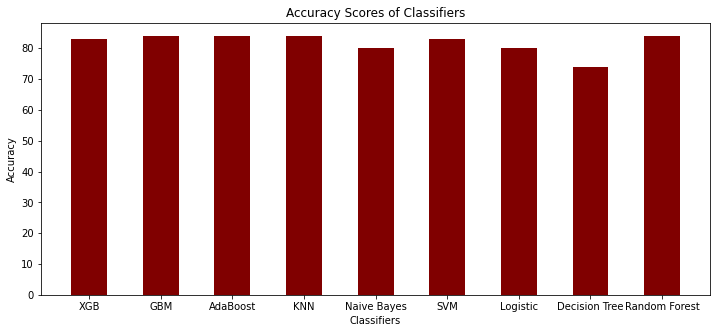

In [350]:
data = {'XGB':83, 'GBM':84, 'AdaBoost':84,
        'KNN':84, 'Naive Bayes': 80, 'SVM': 83, 'Logistic': 80, 'Decision Tree': 74, 'Random Forest': 84}
classifiers = list(data.keys())
accuracy = list(data.values())
fig = plt.figure(figsize = (12, 5))
 
# creating the bar plot
plt.bar(classifiers, accuracy, color ='maroon',
        width = 0.5)
 
plt.xlabel("Classifiers")
plt.ylabel("Accuracy")
plt.title("Accuracy Scores of Classifiers")
plt.show()

GBM is used as the final model for stacking model and XGB, Ada, KNN, Random Forest are used as estimators.

**STACKING MODEL**


---



BUILDING AND TRAINING THE MODEL

In [361]:
from sklearn.ensemble import StackingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier


estimators = [("knn", KNeighborsClassifier(n_neighbors = 80)), 
                ("Ada classifier", AdaBoostClassifier(n_estimators = 5),
                 ("Random forest", RandomForestClassifier(n_estimators=50))
                )]
  
classifier = StackingClassifier(estimators=estimators, final_estimator=GradientBoostingClassifier(n_estimators = 5))
classifier.fit(X_train, y_train)

StackingClassifier(estimators=[('knn', KNeighborsClassifier(n_neighbors=80)),
                               ('Ada classifier',
                                AdaBoostClassifier(n_estimators=5),
                                ('Random forest',
                                 RandomForestClassifier(n_estimators=50)))],
                   final_estimator=GradientBoostingClassifier(n_estimators=5))

MAKING PREDICTIONS

In [362]:
y_pred = classifier.predict(X_test)

EVALUATING THE MODEL

In [363]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm8 = confusion_matrix(y_test, y_pred)
print(cm8)
ac8 = accuracy_score(y_test, y_pred)
print(ac8)

[[31  8]
 [ 3 49]]
0.8791208791208791


Conclusion: 
Stacking model accuracy is highest: 87.91%
New predictions are made using this model.

**MAKING NEW PREDICTIONS**


---



Case of higher risk:

A 57 years old male with chest pain of value 2: atypical angina, and resting blood pressure (mm Hg) is 150, cholestrol 168, has fasting blood sugar less than 120 mg/dl, resting ecg of value 1: having ST-T wave abnormality, maximum heart rate achieved 174, does not have exercise induced anigma, old peak 1.6, slope value 2: flat, number of blood vessles involved: 0, thal rate 2.

In [429]:
classifier.predict(sc.transform([[57, 1, 2, 150, 168, 0, 1, 174, 0, 1.6, 2, 0, 2]]))

array([1])

Case of lower risk:

A 45 year old female with chest pain value 3: no pain anigma, resting blood pressure (mm Hg) is 132, total cholestrol is 170. fasting bloog sugar less than 120 mg/dl, resting ecg normal, heart rate 120, no exercise induced agnina, oldpeak 3, slope value 1: upsloping, 0 number of blood vesseles involved, thal rate 3. 

In [423]:
classifier.predict(sc.transform([[45, 0, 2, 132, 170, 0, 0, 120, 0, 3, 1, 0, 3]]))

array([0])



---
